# Import libraries
----------------------------

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Scikit-learn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import mean_absolute_error as MAE

from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

# Import dataset

In [2]:
data_df = pd.read_csv('house-prices.csv')
data_df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,...,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


# First glance at the data set
------------------------

In [3]:
data_df.shape

(2430, 82)

In [4]:
data_df.describe()

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2430.000000,2.430000e+03,2430.000000,2010.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2410.000000,...,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,1469.478189,7.149375e+08,57.092593,69.201990,10243.557613,6.088889,5.569959,1971.167490,1984.238683,101.995436,...,93.917695,47.091770,22.294650,2.471605,16.529218,2.401235,56.179835,6.209465,2007.783539,180199.692593
std,843.236520,1.887339e+08,42.903254,23.486988,8353.925254,1.414621,1.116442,30.207931,20.751163,176.611699,...,128.106940,67.123846,62.386414,24.880245,56.822227,36.111988,616.661541,2.721942,1.311843,79607.467171
min,1.000000,5.263011e+08,20.000000,21.000000,1470.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,749.250000,5.284770e+08,20.000000,58.000000,7482.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000
50%,1470.500000,5.354541e+08,50.000000,68.000000,9500.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2193.500000,9.071352e+08,70.000000,80.000000,11604.500000,7.000000,6.000000,2000.000000,2003.000000,164.750000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213099.750000
max,2930.000000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Order, PID and MS SubClass are not "numerous" data, they're rather "id" date. We can consider them as "strings"

In [5]:
data_df['Order'] = str(data_df['Order'])
data_df['PID'] = str(data_df['PID'])
data_df['MS SubClass'] = str(data_df['MS SubClass'])

data_df.describe()

,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2010.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2410.000000,2429.000000,2429.000000,2429.000000,...,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000,2430.000000
mean,69.201990,10243.557613,6.088889,5.569959,1971.167490,1984.238683,101.995436,443.944422,51.073693,556.480856,...,93.917695,47.091770,22.294650,2.471605,16.529218,2.401235,56.179835,6.209465,2007.783539,180199.692593
std,23.486988,8353.925254,1.414621,1.116442,30.207931,20.751163,176.611699,457.453649,172.143522,439.650118,...,128.106940,67.123846,62.386414,24.880245,56.822227,36.111988,616.661541,2.721942,1.311843,79607.467171
min,21.000000,1470.000000,1.000000,1.000000,1875.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,58.000000,7482.000000,5.000000,5.000000,1954.000000,1966.000000,0.000000,0.000000,0.000000,216.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129000.000000
50%,68.000000,9500.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,375.000000,0.000000,462.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,80.000000,11604.500000,7.000000,6.000000,2000.000000,2003.000000,164.750000,737.000000,0.000000,799.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213099.750000
max,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,...,1424.000000,742.000000,1012.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


### Type of data
----------------

In [6]:
data_df.dtypes

Order              object
PID                object
MS SubClass        object
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu       object
Garage Type 

In [7]:
# Define list of columns 
continuous_col = ['Lot Frontage','Lot Area', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF','Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val']
ordinal_col = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Heating QC','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC','Fence']
yr_col = ['Year Built','Year Remod/Add','Garage Yr Blt','Yr Sold']
nominal_col = ['MS SubClass','MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style','Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature','Sale Type','Sale Condition']

In [8]:
data_df.columns

Index(['Order', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
      

In [9]:
# Print each value for all ordinal columns
for col in ordinal_col:
    print(col,' :',data_df[col].unique())


Lot Shape  : ['IR1' 'Reg' 'IR2' 'IR3']
Utilities  : ['AllPub' 'NoSewr' 'NoSeWa']
Land Slope  : ['Gtl' 'Mod' 'Sev']
Overall Qual  : [ 7  6  4  5  8  9 10  3  1  2]
Overall Cond  : [5 6 4 8 7 1 9 3 2]
Exter Qual  : ['Gd' 'TA' 'Fa' 'Ex']
Exter Cond  : ['TA' 'Gd' 'Fa' 'Ex' 'Po']
Bsmt Qual  : ['Gd' 'TA' 'Ex' nan 'Fa' 'Po']
Bsmt Cond  : ['TA' 'Gd' 'Fa' nan 'Ex' 'Po']
Bsmt Exposure  : ['No' 'Av' 'Mn' 'Gd' nan]
BsmtFin Type 1  : ['GLQ' 'Unf' 'Rec' 'LwQ' 'BLQ' 'ALQ' nan]
BsmtFin Type 2  : ['Unf' 'LwQ' 'BLQ' nan 'Rec' 'ALQ' 'GLQ']
Heating QC  : ['Ex' 'TA' 'Fa' 'Gd' 'Po']
Electrical  : ['SBrkr' 'FuseF' 'FuseA' 'FuseP' nan 'Mix']
Kitchen Qual  : ['Gd' 'TA' 'Ex' 'Fa' 'Po']
Functional  : ['Typ' 'Mod' 'Maj1' 'Min2' 'Min1' 'Maj2' 'Sal' 'Sev']
Fireplace Qu  : ['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
Garage Finish  : ['Fin' 'Unf' 'RFn' nan]
Garage Qual  : ['TA' 'Fa' nan 'Gd' 'Ex' 'Po']
Garage Cond  : ['TA' nan 'Fa' 'Gd' 'Ex' 'Po']
Paved Drive  : ['Y' 'N' 'P']
Pool QC  : [nan 'Fa' 'Ex' 'TA' 'Gd']
Fence  : [nan 'Mn

### We will later in the project encode the values for Ordinal Values with integer scale and one-hote encoding for Nominal columns

# Data Cleaning
### Missing Values
----------------

In [10]:
data_df.isnull().sum().sort_values(ascending=False)

Pool QC            2418
Misc Feature       2340
Alley              2267
Fence              1941
Fireplace Qu       1186
Lot Frontage        420
Garage Qual         138
Garage Yr Blt       138
Garage Cond         138
Garage Finish       138
Garage Type         136
Bsmt Exposure        74
BsmtFin Type 2       72
BsmtFin Type 1       71
Bsmt Cond            71
Bsmt Qual            71
Mas Vnr Type         20
Mas Vnr Area         20
Bsmt Full Bath        2
Bsmt Half Bath        2
Garage Area           1
Garage Cars           1
Total Bsmt SF         1
Bsmt Unf SF           1
BsmtFin SF 2          1
BsmtFin SF 1          1
Electrical            1
Exterior 2nd          0
Exterior 1st          0
Roof Matl             0
                   ... 
Heating               0
Exter Cond            0
Functional            0
Sale Type             0
Yr Sold               0
Mo Sold               0
Misc Val              0
Pool Area             0
Screen Porch          0
3Ssn Porch            0
Enclosed Porch  

<div class="alert alert-block alert-info">

    Based on the description.txt, what can we do with missing values :
    

    
**REPLACE NaN by ordinal or nominal "NA" which exists in the description :**
- Alley makes sense to be NA if they have no alleyway
- Pool QC makes sense to be NA if they have no pool "Pool Area" == 0 
- Misc Feature
- Fireplace Qu
- Fence
- Garage Type
- Garage Qual
- Garage Finish
- Garage Cond
- Bsmt Exposure (no basement in this property)
- BsmtFin Type 2 (no basement in this property)
- BsmtFin Type 1 (no basement in this property)
- Bsmt Cond (no basement in this property)
- Bsmt Qual (no basement in this property)
- Mas Vnr Type (replace by None)

**REPLACE by another value :**
- Lot Frontage (the minimum is not 0, so we can consider every property to have at least a street connected to it, we will take the mean or median which are pretty close)
- Electrical (replace by SBrkr - most common feature)

**REPLACE by 0 :**
- Mas Vnr Area
- Garage Area
- Garage Cars
- Bsmt Full Bath
- Bsmt Half Bath
- Total Bsmt SF
- Bsmt Unf SF
- BsmtFin SF 2
- BsmtFin SF 1


**LEAVE with NaN :**
- Garage Yr Blt, no need to replace as no garages is built, no year can be chosen for the same 138 properties


In [11]:
# List of all these columns
col_with_nan = data_df.loc[:,data_df.isnull().sum() > 0].columns
col_with_nan

Index(['Lot Frontage', 'Alley', 'Mas Vnr Type', 'Mas Vnr Area', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Electrical', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Fireplace Qu',
       'Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond', 'Pool QC', 'Fence',
       'Misc Feature'],
      dtype='object')

In [12]:
# Replace NaN by NA
col_nan_to_na = [x for x in col_with_nan if x not in ['Electrical','Lot Frontage','Mas Vnr Area','Garage Area','Garage Cars', 'Garage Yr Blt','Bsmt Full Bath','Bsmt Half Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1']]

for col in col_nan_to_na:
    if col == 'Mas Vnr Type':
        data_df[col] = data_df[col].fillna('None')
    else:
        data_df[col] = data_df[col].fillna('NA') # replace by existing "NA" in documentation


In [13]:
# Replace NaN by 0

for col in ['Mas Vnr Area','Garage Area','Garage Cars', 'Bsmt Full Bath','Bsmt Half Bath','Total Bsmt SF','Bsmt Unf SF','BsmtFin SF 2','BsmtFin SF 1']:
    data_df[col] = data_df[col].fillna(0) # replace by 0 as it represents a "number"

In [14]:
# Replace NaN by other value 

# by most frequent value
data_df['Electrical'] = data_df['Electrical'].fillna(data_df['Electrical'].value_counts().idxmax())

# by median value
data_df['Lot Frontage'] = data_df['Lot Frontage'].fillna(data_df['Lot Frontage'].median())

In [15]:
# Check null values in dataframe

data_df.isnull().sum().sort_values(ascending=False).head()

Garage Yr Blt     138
SalePrice           0
Year Remod/Add      0
Roof Style          0
Roof Matl           0
dtype: int64

<div class="alert alert-block alert-success">

    Missing values
### Eventually, we have removed all missing values, except 'Garage Yr Built' for houses without a Garage. It don't think it would bring more information to change these values

### Correct Years > 2010

In [16]:

for col in yr_col:
    print(col,' : between ',data_df[col].min(),' and ',data_df[col].max())

Year Built  : between  1875  and  2010
Year Remod/Add  : between  1950  and  2010
Garage Yr Blt  : between  1896.0  and  2207.0
Yr Sold  : between  2006  and  2010


**We see a year at "2207", based on the rest of the data, we can suppose it is "2007"**

In [17]:
# Change 2207 to 2007
data_df.loc[data_df.loc[data_df['Garage Yr Blt'] == 2207].index,'Garage Yr Blt'] = 2007

#data_df['Garage Yr Blt'] = int(data_df['Garage Yr Blt'])

# Check Year range again : 
for col in yr_col:
    print(col,' : between ',data_df[col].min(),' and ',data_df[col].max())

Year Built  : between  1875  and  2010
Year Remod/Add  : between  1950  and  2010
Garage Yr Blt  : between  1896.0  and  2010.0
Yr Sold  : between  2006  and  2010


<div class="alert alert-block alert-success">

The years range we can see here is more consistent and all below 2010, the end-year of the analysis.

### Consistency of columns
If there is no garage, no basement,... the other values concerning should not be filled either
- Garage
- Basement
- Masonry
- Pool
- Fireplace

<div class="alert alert-block alert-info">

Masonry

In [18]:
# Masonry columns
data_df.iloc[:, lambda df:df.columns.str.contains('Mas', case=False)].columns

Index(['Mas Vnr Type', 'Mas Vnr Area'], dtype='object')

In [19]:
# index of inconsistent values based on Description.txt
inconsistent_index = data_df.loc[(data_df['Mas Vnr Type']== 'None') & (data_df['Mas Vnr Area'] >0)].index

In [21]:
for i in inconsistent_index:
    data_df.iloc[i, data_df.columns.get_loc('Mas Vnr Area')] = 0

data_df.loc[(data_df['Mas Vnr Type']== 'None') & (data_df['Mas Vnr Area'] >0)] # check

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice


<div class="alert alert-block alert-info">

Basement

In [22]:
# Basement columns
bsmt_col = data_df.iloc[:, lambda df:df.columns.str.contains('Bsm', case=False)].columns

In [23]:
data_df.loc[(data_df['Bsmt Cond']!= 'NA') & (data_df['Bsmt Qual'] !='NA') & (data_df['Bsmt Exposure']== 'NA') ][bsmt_col]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath
875,Gd,TA,NA,Unf,0.0,Unf,0.0,1595.0,1595.0,0.0,0.0
1681,Gd,TA,NA,Unf,0.0,Unf,0.0,725.0,725.0,0.0,0.0
1726,Gd,TA,NA,Unf,0.0,Unf,0.0,936.0,936.0,0.0,0.0


In [27]:
# 3 Exposures at "NA" (no basement) instead "No" (no exposure)
for i in data_df.loc[(data_df['Bsmt Cond']!= 'NA') & (data_df['Bsmt Qual'] !='NA') & (data_df['Bsmt Exposure']== 'NA') ].index:
    data_df.iloc[i, data_df.columns.get_loc('Bsmt Exposure')] = "No"

In [28]:
for col in bsmt_col:
    print(col,' :',len(data_df.loc[(data_df[col] == 'NA') | (data_df[col] == 0)]))
    

Bsmt Qual  : 71
Bsmt Cond  : 71
Bsmt Exposure  : 71
BsmtFin Type 1  : 71
BsmtFin SF 1  : 774
BsmtFin Type 2  : 72
BsmtFin SF 2  : 2136
Bsmt Unf SF  : 211
Total Bsmt SF  : 71
Bsmt Full Bath  : 1414
Bsmt Half Bath  : 2287


In [29]:
# Check if total Basement Square Feet = the sum of all surfaces
data_df.loc[(data_df['Total Bsmt SF']) != (data_df['Bsmt Unf SF']+data_df['BsmtFin SF 1']+data_df['BsmtFin SF 2'])][bsmt_col]

,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Bsmt Full Bath,Bsmt Half Bath


**Eventually, Basement Columns look consistent to one another and possibly only 71 properties without Basements.**

<div class="alert alert-block alert-info">

Fireplace

In [30]:
# Fireplace columns
fire_col = data_df.iloc[:, lambda df:df.columns.str.contains('Fire', case=False)].columns
fire_col


Index(['Fireplaces', 'Fireplace Qu'], dtype='object')

In [31]:
data_df.loc[(data_df['Fireplaces'] != 0) & (data_df['Fireplace Qu'] =='NA') ][fire_col]

,Fireplaces,Fireplace Qu


In [32]:
for col in fire_col:
    print(col,' :',len(data_df.loc[(data_df[col] == 'NA') | (data_df[col] == 0)]))

Fireplaces  : 1186
Fireplace Qu  : 1186


**Fireplace are consistent to one another, half of the properties don't have them.**

<div class="alert alert-block alert-info">

Garage

In [33]:
# Garage columns
garage_col = data_df.iloc[:, lambda df:df.columns.str.contains('Gara', case=False)].columns
garage_col


Index(['Garage Type', 'Garage Yr Blt', 'Garage Finish', 'Garage Cars',
       'Garage Area', 'Garage Qual', 'Garage Cond'],
      dtype='object')

In [34]:
for col in garage_col:
    print(col,' :',len(data_df.loc[(data_df[col] == 'NA') | (data_df[col] == 0) | (data_df[col].isnull())]))

Garage Type  : 136
Garage Yr Blt  : 138
Garage Finish  : 138
Garage Cars  : 137
Garage Area  : 137
Garage Qual  : 138
Garage Cond  : 138


**Garage are fairly consistent to one another, half of the properties don't have them.**
Only one missing Garage Type

<div class="alert alert-block alert-info">

Pool

In [35]:
# Garage columns
pool_col = data_df.iloc[:, lambda df:df.columns.str.contains('Pool', case=False)].columns
pool_col

Index(['Pool Area', 'Pool QC'], dtype='object')

In [60]:
for col in pool_col:
    print(col,' :',len(data_df.loc[(data_df[col] == 'NA') | (data_df[col] == 0)]))

Pool Area  : 2418
Pool QC  : 2418


In [37]:
# Print each value for all ordinal columns
for col in pool_col:
    print(col,' :',data_df[col].unique())

Pool Area  : [  0 648 555 228 144 519 561 480 512 576 444 800 368]
Pool QC  : ['NA' 'Fa' 'Ex' 'TA' 'Gd']


**Most houses don't have a Pool, but it can still be relevant for the price**

### Outliers for continuous data

Quick look at the distribution with $np.log1p()$

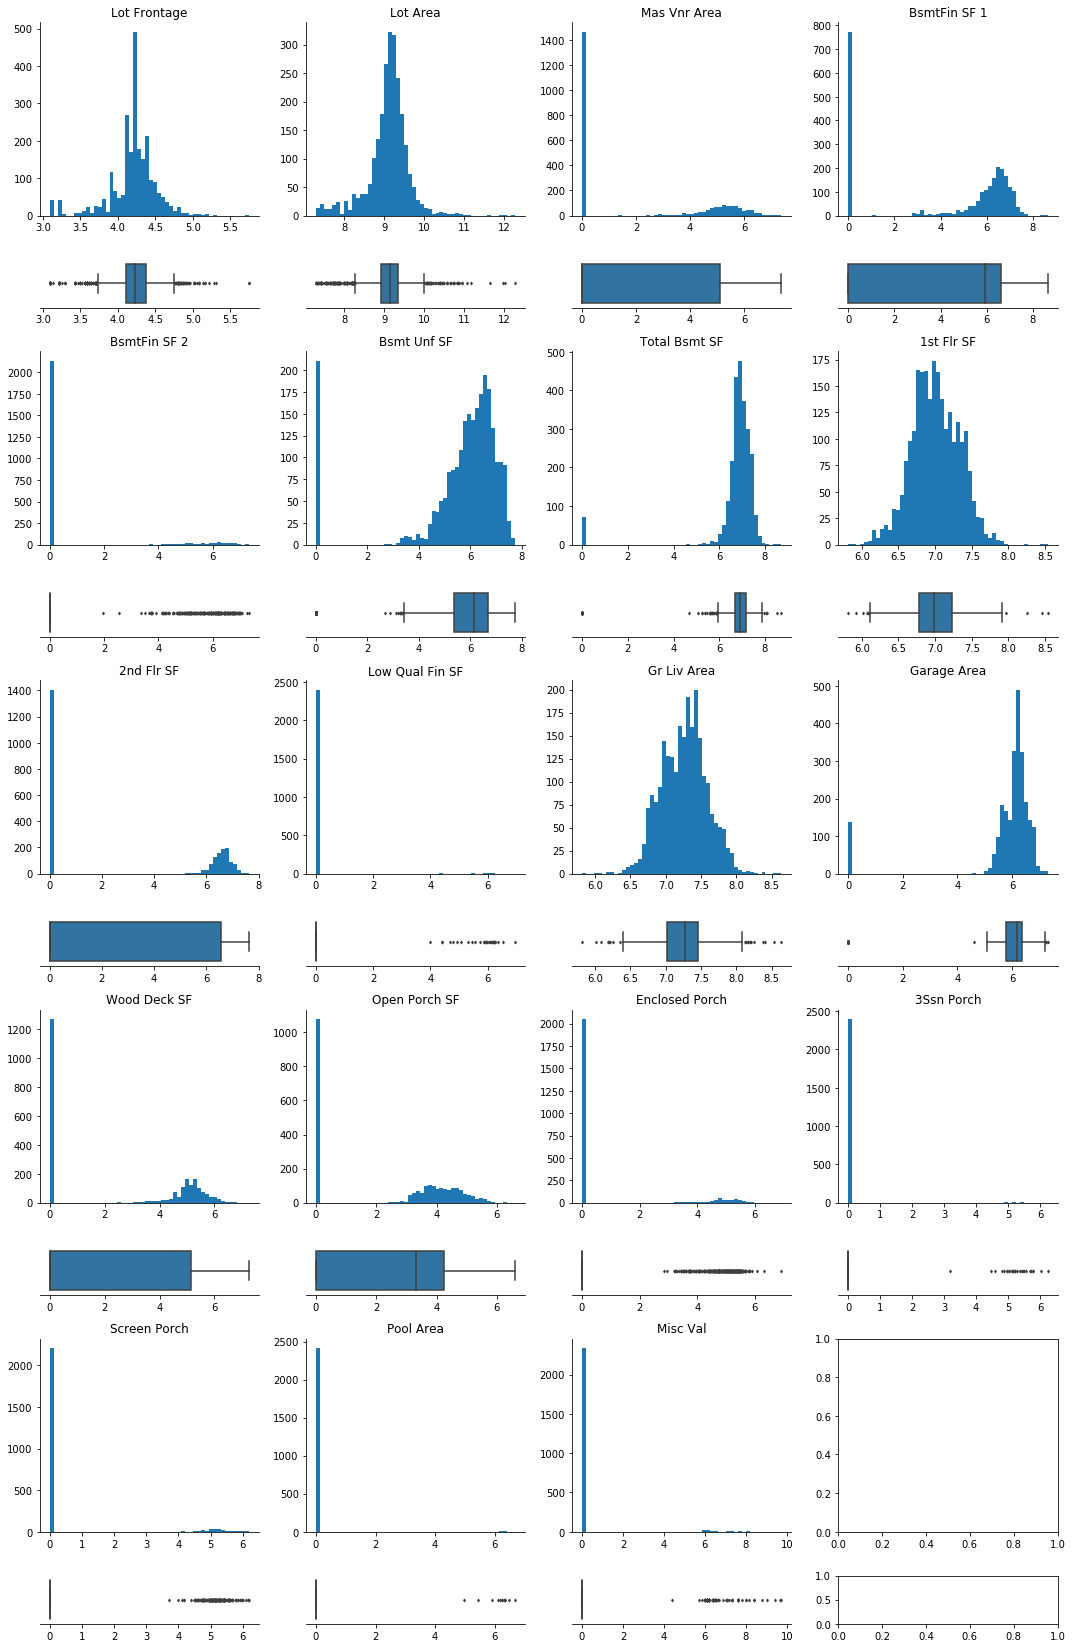

In [50]:
# 20 subplots of all continuous data
fig, axes = plt.subplots(
    10, 4 ,gridspec_kw={"height_ratios": (0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.8 ,0.2)}, figsize=(15,23)
)
# pairing feature with column in plot
for row, i in zip([0,2,4,6,8],[0,1,2,3,4])  :

    for (feat, plot_col) in zip(continuous_col[0+4*i:4+4*i], [0,1,2,3]  ):

        axes[0+row, plot_col].hist(np.log1p(data_df[feat]), bins=50)
        axes[0+row, plot_col].set_title("{}".format(feat))
        sns.despine(ax=axes[0+row, plot_col])
        sns.boxplot(np.log1p(data_df[feat]), ax=axes[1+row, plot_col], fliersize=2)
        axes[1+row, plot_col].set(yticks=[])
        #axes[1+row, plot_col].set_title("{}".format(data_df[feat].median))
        sns.despine(ax=axes[1+row, plot_col], left=True)

    for ax in axes.flatten():
        ax.set_xlabel("")
plt.tight_layout()
plt.show()

In [52]:
data_df['Pool Area'].describe()


count    2430.000000
mean        2.401235
std        36.111988
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Pool Area, dtype: float64

<div class="alert alert-block alert-danger">


### My feeling about what I would mathematically consider outliers with z-score, would impact the Sales Price greatly.
For example, houses with a pool or a 3-Season Porch are z-score outliers but at the same time, are probably more expensive and impacted by the presence of a pool.
    
I am not convinced a mathematical outlier removal makes sense, I would rather check "visually" those outliers. Indeed, many outliers could be specific case.
    
### 1) First let's try z-score on each column :
### 2) Then visually remove outliers :

### Let's see if these continuous features have a strong "correlation" with the Sale Price. 

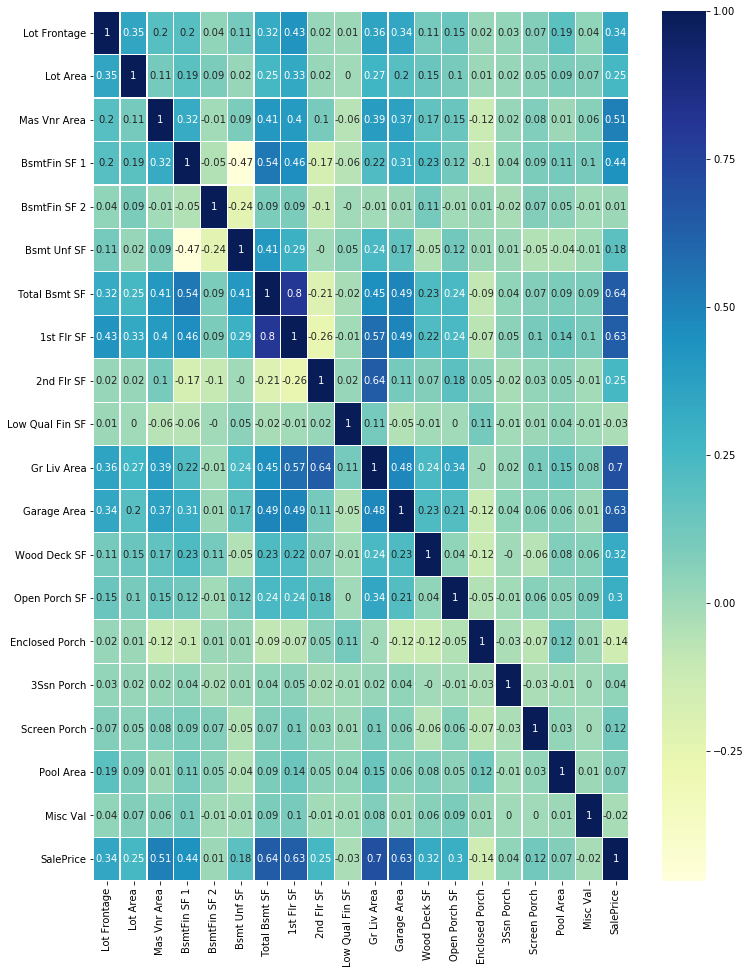

In [96]:
# check correlations between continuous data and sales price

df_corr = data_df[continuous_col +['SalePrice']].corr(method='pearson').round(2)

plt.figure(figsize=(12, 16))
sns.heatmap(df_corr, 
            xticklabels=df_corr.columns,
            yticklabels=df_corr.columns,
            cmap='YlGnBu',
            annot=True,
            linewidth=0.3);
# blue is better, positive influence

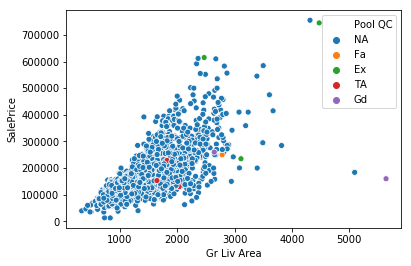

In [94]:
sns.scatterplot(data_df['Gr Liv Area'], data_df['SalePrice'],  hue = data_df['Pool QC'])

# Feature Engineering

### Encode ordinal to grades 1 to 5 ? est-ce utile ?


In [200]:
from sklearn.preprocessing import OrdinalEncoder

# Handle ordinal variables

ordinal_transformer = OrdinalEncoder(categories=[ordinal_col])

### One hot encoding

In [80]:
from sklearn.preprocessing import OneHotEncoder

# Create encoder
encoder = OneHotEncoder(handle_error='ignore')
encoder.fit_transform(data_df)

TypeError: __init__() got an unexpected keyword argument 'handle_error'

In [196]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Handle nominal variables
nominal_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# Create the column transformer
preprocessor = ColumnTransformer([
    ('nominal', nominal_transformer, nominal_col),
    ('ordinal', ordinal_transformer, ordinal_col),
], remainder='drop')


In [198]:

encoded = preprocessor.fit_transform(data_df)
#encoded.shape

ValueError: Shape mismatch: if n_values is an array, it has to be of shape (n_features,).

SNS pairplot avec sales price et chque data

# Feture Engineering